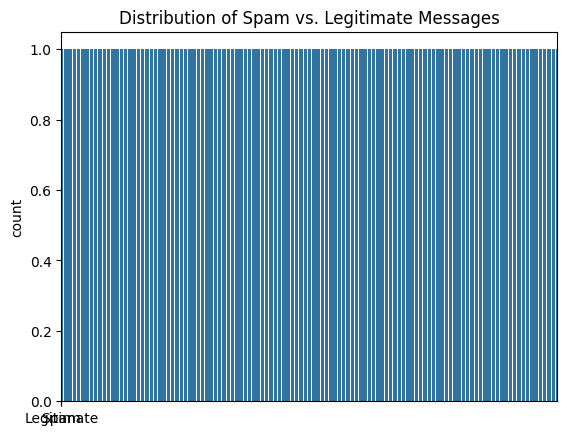

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Load and preprocess the data
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# EDA - Distribution of Spam vs. Legitimate Messages
sns.countplot(data['label'])
plt.title('Distribution of Spam vs. Legitimate Messages')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Spam'])
plt.show()

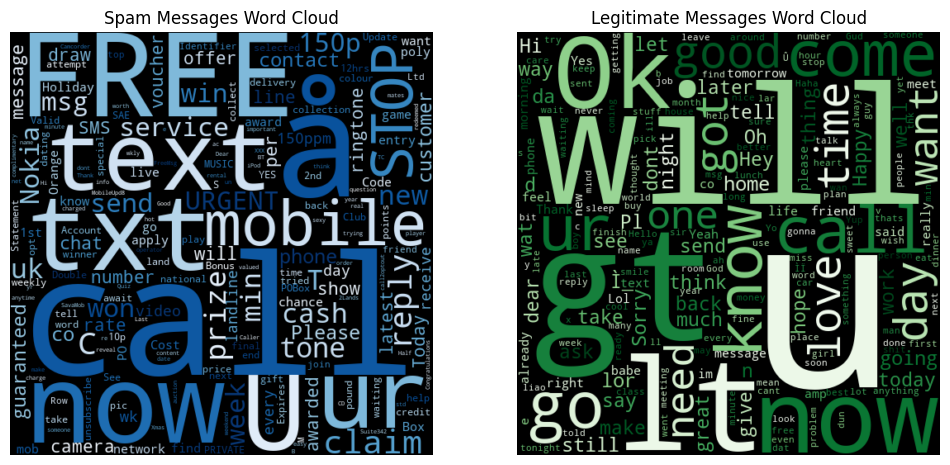

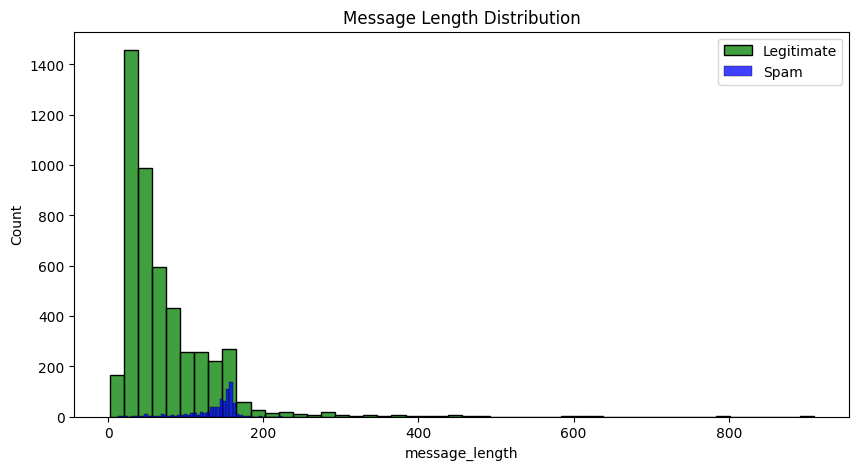

In [8]:
# Word Clouds for Spam and Legitimate Messages
spam_words = ' '.join(list(data[data['label'] == 1]['message']))
spam_wc = WordCloud(width=512, height=512, collocations=False,
                    colormap="Blues", background_color="black").generate(spam_words)

legit_words = ' '.join(list(data[data['label'] == 0]['message']))
legit_wc = WordCloud(width=512, height=512, collocations=False,
                     colormap="Greens", background_color="black").generate(legit_words)

# Display Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(legit_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Legitimate Messages Word Cloud')
plt.show()

# Message Length Distribution
data['message_length'] = data['message'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data[data['label'] == 0]['message_length'],
             bins=50, color='green', label='Legitimate')
sns.histplot(data[data['label'] == 1]['message_length'],
             bins=50, color='blue', label='Spam')
plt.title('Message Length Distribution')
plt.legend()
plt.show()

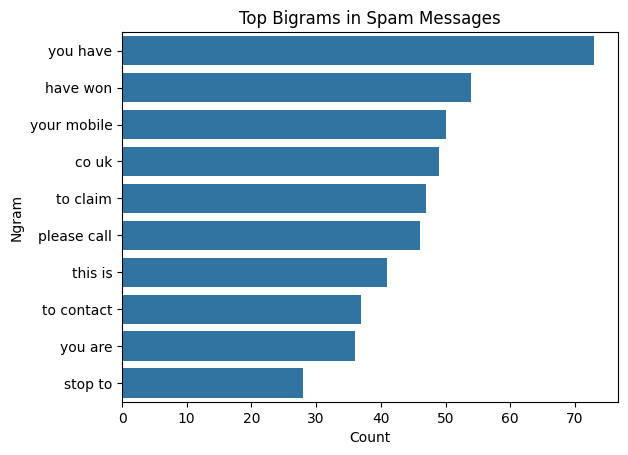

In [9]:
def plot_top_ngrams(text, ngram_range=(1, 1), top_n=10, title="Top N-Grams"):
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(text)
    bow = vectorizer.transform(text)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:top_n]
    df = pd.DataFrame(top_words, columns=['Ngram', 'Count'])
    sns.barplot(x='Count', y='Ngram', data=df)
    plt.title(title)
    plt.show()


# Top Bigrams in Spam Messages
plot_top_ngrams(data[data['label'] == 1]['message'], ngram_range=(
    2, 2), title="Top Bigrams in Spam Messages")

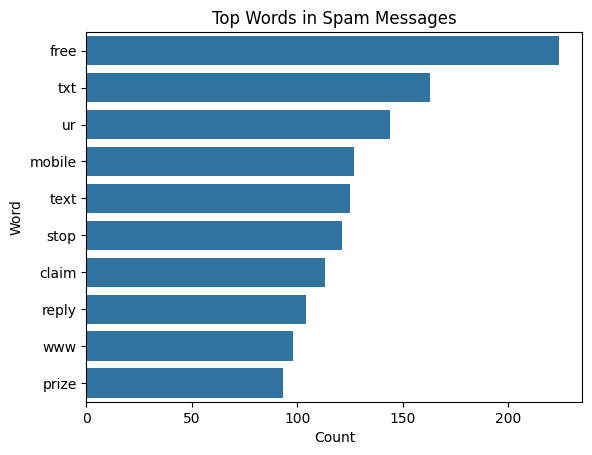

In [10]:
def plot_top_words(text, top_n=10, title="Top Words"):
    vectorizer = CountVectorizer(stop_words='english').fit(text)
    bow = vectorizer.transform(text)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:top_n]
    df = pd.DataFrame(top_words, columns=['Word', 'Count'])
    sns.barplot(x='Count', y='Word', data=df)
    plt.title(title)
    plt.show()


# Top Words in Spam Messages
plot_top_words(data[data['label'] == 1]['message'],
               title="Top Words in Spam Messages")

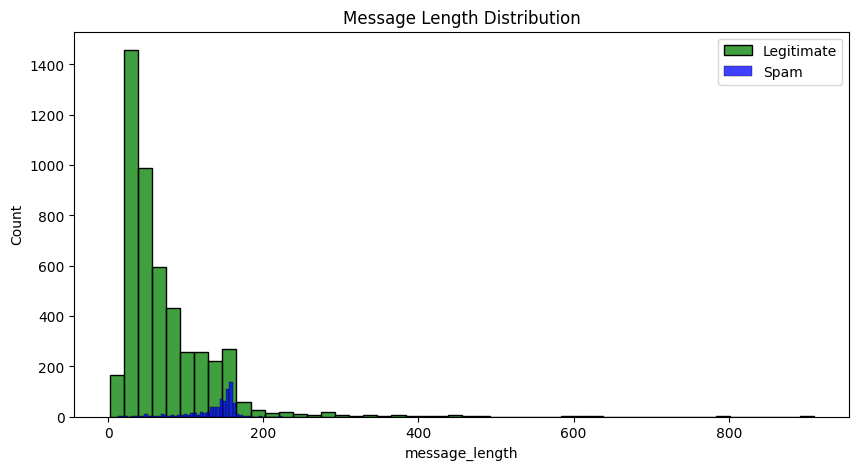

In [11]:
data['message_length'] = data['message'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data[data['label'] == 0]['message_length'],
             bins=50, color='green', label='Legitimate')
sns.histplot(data[data['label'] == 1]['message_length'],
             bins=50, color='blue', label='Spam')
plt.title('Message Length Distribution')
plt.legend()
plt.show()

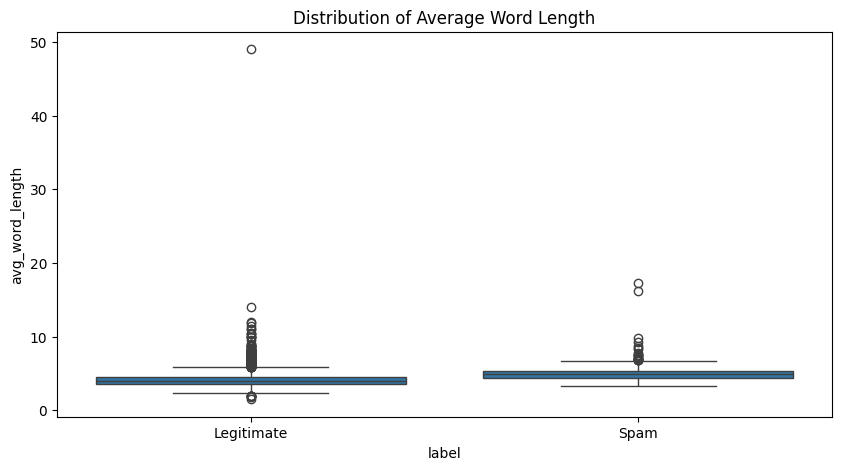

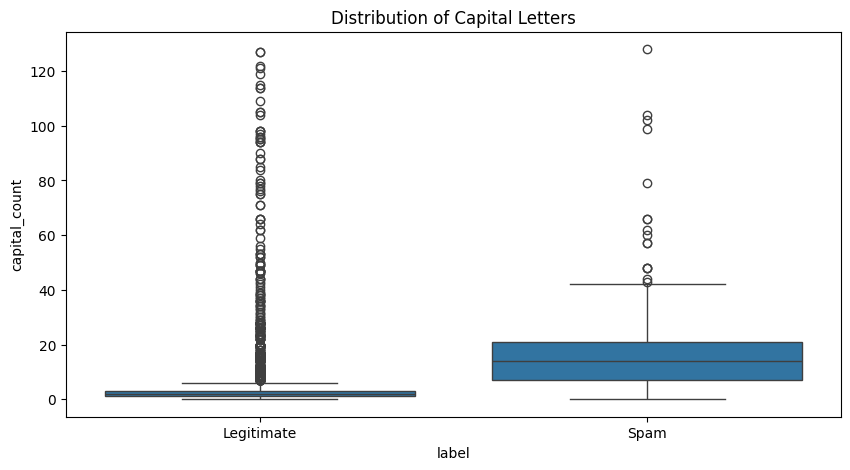

In [12]:
data['avg_word_length'] = data['message'].apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()))

plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='avg_word_length', data=data)
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Spam'])
plt.title('Distribution of Average Word Length')
plt.show()

data['capital_count'] = data['message'].apply(
    lambda x: sum(1 for c in x if c.isupper()))
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='capital_count', data=data)
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Spam'])
plt.title('Distribution of Capital Letters')
plt.show()

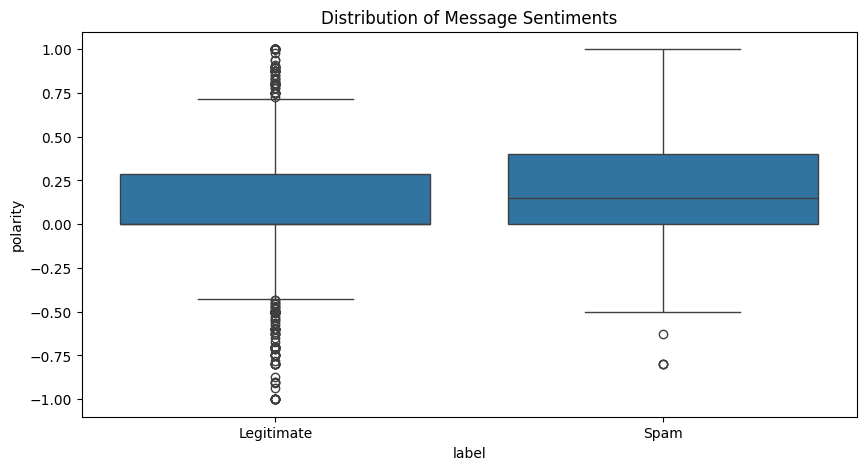

In [13]:
from textblob import TextBlob

data['polarity'] = data['message'].apply(
    lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='polarity', data=data)
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Spam'])
plt.title('Distribution of Message Sentiments')
plt.show()

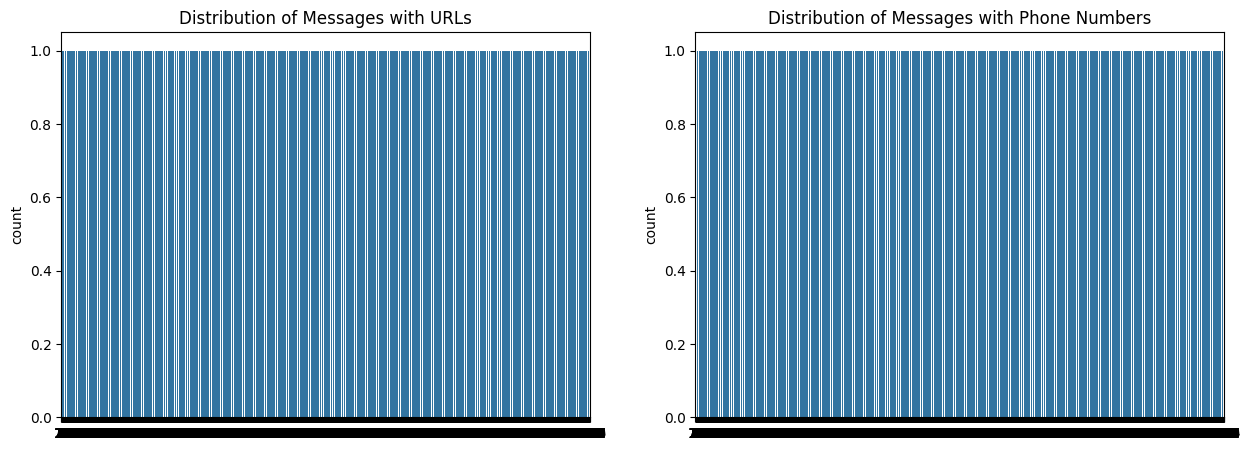

In [14]:
data['has_url'] = data['message'].str.contains('http://|https://|www.')
data['has_phone'] = data['message'].str.contains(
    r'\b\d{10}\b')  # For a 10-digit phone number pattern

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data['has_url'])
plt.title('Distribution of Messages with URLs')

plt.subplot(1, 2, 2)
sns.countplot(data['has_phone'])
plt.title('Distribution of Messages with Phone Numbers')

plt.show()

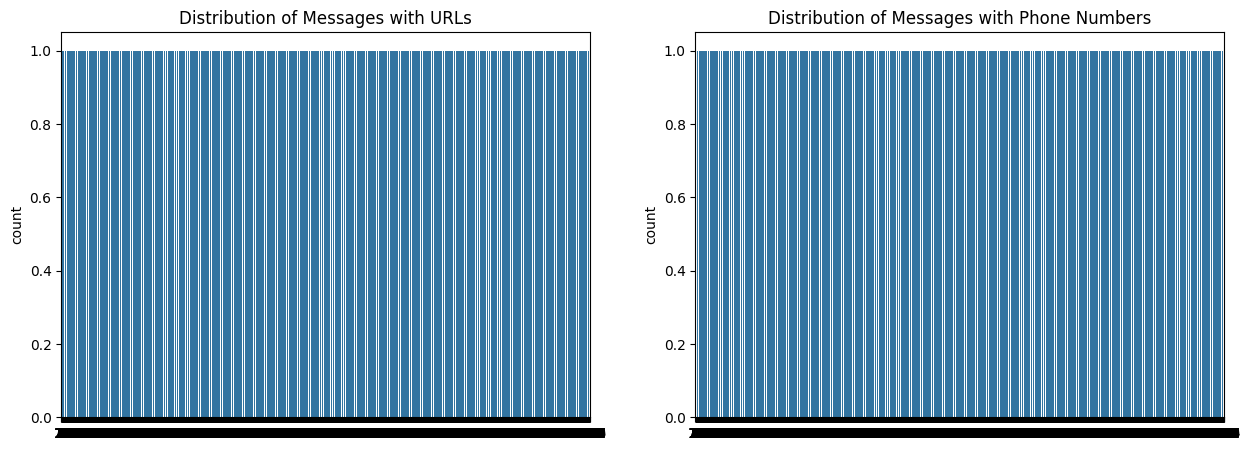

In [15]:
data['has_url'] = data['message'].str.contains('http://|https://|www.')
data['has_phone'] = data['message'].str.contains(
    r'\b\d{10}\b')  # For a 10-digit phone number pattern

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data['has_url'])
plt.title('Distribution of Messages with URLs')

plt.subplot(1, 2, 2)
sns.countplot(data['has_phone'])
plt.title('Distribution of Messages with Phone Numbers')

plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])
y = data['label']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred_nb = clf.predict(X_test)

print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy:  0.968609865470852
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [19]:
from sklearn.linear_model import LogisticRegression

# Training
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_lr = clf_lr.predict(X_test)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.9443946188340807
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



In [20]:
from sklearn.svm import SVC

# Training
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_svm = clf_svm.predict(X_test)

print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy:  0.9748878923766816
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.84      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
from sklearn.tree import DecisionTreeClassifier

# Training
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_tree = clf_tree.predict(X_test)

print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy:  0.967713004484305
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.90      0.86      0.88       150

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Training
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_rf = clf_rf.predict(X_test)

print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.9775784753363229
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Training
clf_gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_gbm.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_gbm = clf_gbm.predict(X_test)

print("GBM Accuracy: ", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

GBM Accuracy:  0.9587443946188341
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.70      0.82       150

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



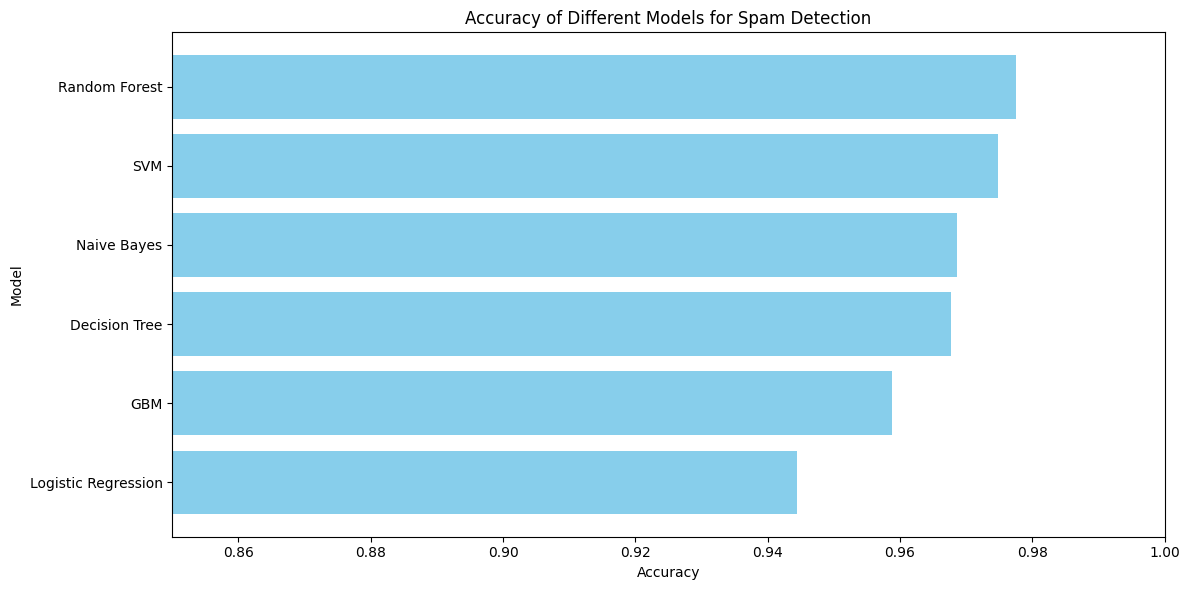

In [24]:
accuracies = {
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "GBM": accuracy_score(y_test, y_pred_gbm)
}

# Sorting the models based on their accuracies
sorted_acc = dict(sorted(accuracies.items(), key=lambda item: item[1]))

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(list(sorted_acc.keys()), list(sorted_acc.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models for Spam Detection')
# Assuming accuracies are in the range 0.85 to 1. Adjust as needed.
plt.xlim(0.85, 1)
plt.tight_layout()
plt.show()

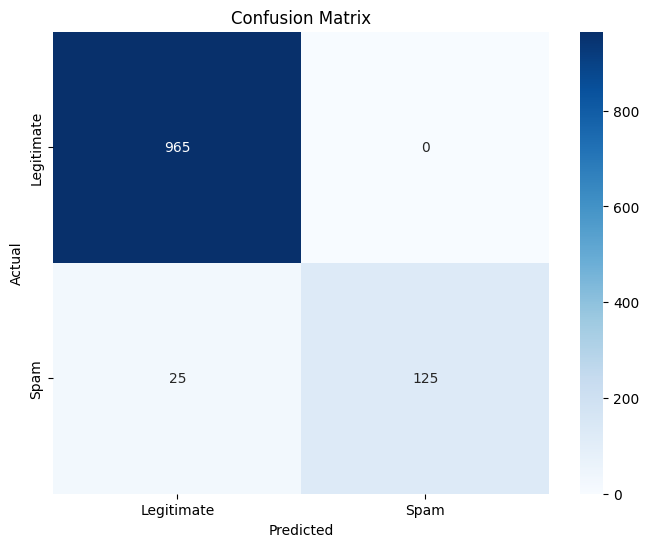

In [25]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Legitimate', 'Spam'], yticklabels=['Legitimate', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()